<a href="https://colab.research.google.com/github/sipocz/_dengue/blob/main/_dengue_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#_Dengue
_project="_dengue"
_PCVERSION_=False
_GITHUBVERSION_=True
_GOOGLEVERSION_=False
if _PCVERSION_:
    basedir="C:/Users/sipocz/OneDrive/Dokumentumok/GitHub"

if _GOOGLEVERSION_:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    basedir="/content/drive/My Drive/001_AI"

if _GITHUBVERSION_:
    !mkdir _dengue
    files=["dengue_features_train.csv","dengue_labels_train.csv","dengue_features_test.csv"]
    path="https://raw.githubusercontent.com/sipocz/_dengue/main/"
    basedir="./"
    storeto=basedir+_project
    for f in files:
        fname=path+f
        !rm $f
        !wget $fname
        !mv $f $storeto



rm: cannot remove 'dengue_features_train.csv': No such file or directory
--2021-08-05 15:14:05--  https://raw.githubusercontent.com/sipocz/_dengue/main/dengue_features_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287139 (280K) [text/plain]
Saving to: ‘dengue_features_train.csv’

dengue_features_tra 100%[===================>] 280.41K  --.-KB/s    in 0.02s   

2021-08-05 15:14:05 (13.7 MB/s) - ‘dengue_features_train.csv’ saved [287139/287139]

rm: cannot remove 'dengue_labels_train.csv': No such file or directory
--2021-08-05 15:14:06--  https://raw.githubusercontent.com/sipocz/_dengue/main/dengue_labels_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#--------------scikit import 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#--------------
def outlierStatistic(X_train_predict):
    print(X_train_predict)
    maxX=len(X_train_predict)
    outlier=0
    for i in X_train_predict:
        if i==-1:
            outlier+=1
    print(f"A összes ({maxX} darabból {outlier} darab outlier van. Az {outlier/maxX*100:5.1f} %.)")

features_train=basedir+_project+"/"+"dengue_features_train.csv"
labels_train=basedir+_project+"/"+"dengue_labels_train.csv"
features_test=basedir+_project+"/"+"dengue_features_test.csv"


X_train=pd.read_csv(features_train)
y_train=pd.read_csv(labels_train)
X_test=pd.read_csv(features_test)








In [3]:
X_test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [4]:
X_test.fillna(method="bfill", inplace=True)
X_train.fillna(method="bfill", inplace=True)


In [5]:
X_test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [6]:
len(list(X_test[X_test.isnull().T.any().T]))

24

In [7]:
X_test[X_test.isnull().T.any().T].head(124)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm


In [8]:
X_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [9]:
y_train

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [10]:
X_train["total_cases"]=y_train["total_cases"]

In [11]:

X_train_sj=X_train[X_train.city == "sj"]
X_train_iq=X_train[X_train.city == "iq"]


In [12]:

X_test_sj=X_test[X_test.city == "sj"]
X_test_iq=X_test[X_test.city == "iq"]

In [13]:
X_train_sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [14]:
print(X_train_sj.head())
print(X_train_sj.tail())


  city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
0   sj  1990          18  ...               20.0               16.0            4
1   sj  1990          19  ...               22.2                8.6            5
2   sj  1990          20  ...               22.8               41.4            4
3   sj  1990          21  ...               23.3                4.0            3
4   sj  1990          22  ...               23.9                5.8            6

[5 rows x 25 columns]
    city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
931   sj  2008          13  ...               21.1                1.8            4
932   sj  2008          14  ...               22.2                0.5            3
933   sj  2008          15  ...               21.7               30.7            1
934   sj  2008          16  ...               21.7               11.2            3
935   sj  2008          17  ...               23.3                0.3       

In [15]:
print(X_test_sj.head())
print(X_test_sj.tail())

  city  year  ...  station_min_temp_c station_precip_mm
0   sj  2008  ...                21.7              75.2
1   sj  2008  ...                22.2              34.3
2   sj  2008  ...                22.8               3.0
3   sj  2008  ...                24.4               0.3
4   sj  2008  ...                23.3              84.1

[5 rows x 24 columns]
    city  year  ...  station_min_temp_c station_precip_mm
255   sj  2013  ...                22.8               3.5
256   sj  2013  ...                22.8              17.6
257   sj  2013  ...                23.3               9.4
258   sj  2013  ...                23.9              22.9
259   sj  2013  ...                21.7              47.5

[5 rows x 24 columns]


In [16]:
X_train.week_start_date.convert_dtypes()


0       1990-04-30
1       1990-05-07
2       1990-05-14
3       1990-05-21
4       1990-05-28
           ...    
1451    2010-05-28
1452    2010-06-04
1453    2010-06-11
1454    2010-06-18
1455    2010-06-25
Name: week_start_date, Length: 1456, dtype: string

In [17]:
correlation=X_train_sj.corr()

In [18]:
correlation["ndvi_se"]

year                                    -0.021660
weekofyear                              -0.004102
ndvi_ne                                  0.226655
ndvi_nw                                  0.198294
ndvi_se                                  1.000000
ndvi_sw                                  0.821493
precipitation_amt_mm                    -0.115958
reanalysis_air_temp_k                   -0.009453
reanalysis_avg_temp_k                   -0.007267
reanalysis_dew_point_temp_k             -0.057574
reanalysis_max_air_temp_k               -0.001844
reanalysis_min_air_temp_k               -0.039837
reanalysis_precip_amt_kg_per_m2         -0.127393
reanalysis_relative_humidity_percent    -0.110548
reanalysis_sat_precip_amt_mm            -0.115958
reanalysis_specific_humidity_g_per_kg   -0.053207
reanalysis_tdtr_k                        0.027920
station_avg_temp_c                      -0.049498
station_diur_temp_rng_c                  0.022365
station_max_temp_c                      -0.055438


In [19]:
X_train_sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Text(0, 0, 'Hubert')

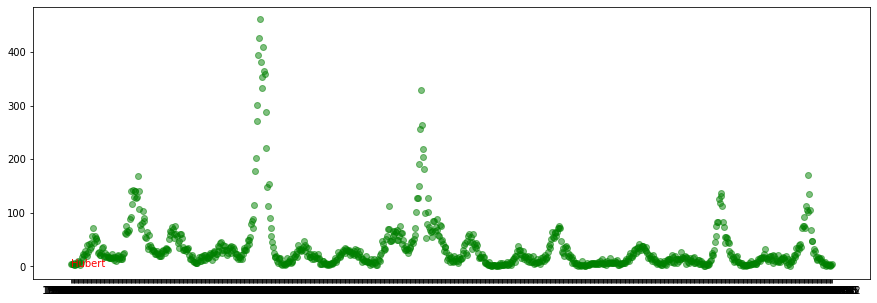

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(111)
#plt.scatter(indexer,,c="green",alpha=0.5)
plt.scatter(X_train_sj["week_start_date"],X_train_sj["total_cases"],c="green",alpha=0.5)
#plt.scatter(indexer,hubpred_no_outliers[:],c="red",alpha=0.5)
#plt.plot(df["Id"],diffihubert[:])
plt.text(0,0,"Hubert",c="red")

In [21]:
!rm visual_view.py
!wget https://raw.githubusercontent.com/sipocz/messer/main/visual_view.py
grafikon=None
from visual_view import grafikon
help(grafikon)

rm: cannot remove 'visual_view.py': No such file or directory
--2021-08-05 15:14:18--  https://raw.githubusercontent.com/sipocz/messer/main/visual_view.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1027 (1.0K) [text/plain]
Saving to: ‘visual_view.py’

visual_view.py      100%[===================>]   1.00K  --.-KB/s    in 0s      

2021-08-05 15:14:19 (51.1 MB/s) - ‘visual_view.py’ saved [1027/1027]

Help on function grafikon in module visual_view:

grafikon(fx, desc1, txt1, desc2='', txt2='', ngraf=2, c1='rgba(35,128,132,0.8)', c2='rgba(193,99,99,0.8)', title=None)
    fx: dataFrame
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c1: color1
    c2: color2
    title: graph title



In [22]:
grafikon(X_train_sj,"total_cases","total_cases",ngraf=1,title="Adatok")

In [23]:
def grafikon(fx,ind,desc1,txt1,desc2="",txt2="",desc3="",txt3="",ngraf=2,c1='rgba(35,128,132,0.8)', c2='rgba(193,99,99,0.8)',c3='rgba(193,99,0,0.8)',title=None):
    '''
    fx: dataFrame
    ind: index
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c1: color1
    c2: color2
    title: graph title
    '''
    
    #x_=[i for i in range(len(y_pred))]
    if title==None:
      title=txt1+txt2
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    fig0 = make_subplots(rows=1, cols=1)
    
    if True:
        fig0.add_trace(
            go.Scatter(x=fx[ind], y=fx[desc1], name=txt1, line=dict(color=c1) ,showlegend=True  ),

            row=1, col=1

        )
    
    if ngraf>1:
        fig0.add_trace(
            go.Scatter(x=fx[ind], y=fx[desc2], name=txt2, line=dict(color=c2) ,showlegend=True  ),

            row=1, col=1
        )
    if ngraf>2:
        fig0.add_trace(
            go.Scatter(x=fx[ind], y=fx[desc3], name=txt3, line=dict(color=c3) ,showlegend=True  ),

            row=1, col=1
        )



    fig0.update_layout(
        title=title,
        autosize=False,
        width=1200,
        height=600,
        
        )

    fig0.show()

In [24]:
grafikon(X_train_sj,"week_start_date","total_cases","total_cases","reanalysis_relative_humidity_percent","reanalysis_relative_humidity_percent","station_avg_temp_c","station_avg_temp_c",ngraf=3,title="Adatok")

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from statsmodels.tsa.seasonal import  seasonal_decompose

import matplotlib as mpl

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [26]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df=X_train_sj

data1 = seasonal_decompose(df["total_cases"][0:-1].values,model="additive", freq=51,) # 5 percenként vannak a minták
  

fig2 = make_subplots(rows=4, cols=1,shared_xaxes=True)
fig2.add_trace(
    go.Scatter(x=df.index[0:-1], y=data1.resid,name="Residual" ),

    row=1, col=1
)
fig2.add_trace(
    go.Scatter( x=df.index[0:-1], y=data1.trend,name="Trend"),

    row=2, col=1
)
fig2.add_trace(
    go.Scatter( x=df.index[0:-1], y=data1.seasonal,name="Seasonal"),

    row=3, col=1
)

fig2.add_trace(
    go.Scatter( x=df.index[0:-1], y=data1.observed,name="Observed"),

    row=4, col=1
)

fig2.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
)

fig2.show()



In [27]:
X_train_sj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [28]:
prediktorok=['weekofyear',  'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

In [29]:
X_train_sj.isnull().sum()


city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [30]:
X_train_sj.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
from sklearn.linear_model import Lasso




alpha=0.00001
lassoreg = Lasso(alpha=alpha,normalize=False, max_iter=500, tol=0.0001)
lassoreg.fit(X_train_sj[prediktorok],X_train_sj[['total_cases']])
y_pred = lassoreg.predict(X_train_sj[prediktorok])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1049663.845683744, tolerance: 246.84424861111117



In [32]:
y_pred=y_pred.T

In [33]:
X_train_sj["pred"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
grafikon(X_train_sj,"week_start_date","total_cases","total_cases","pred","pred",title="prediction",)

Ez a LAsso nem valami szép

In [35]:
X_train_sj.tail(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,pred
931,sj,2008,13,2008-03-25,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4,33.697978
932,sj,2008,14,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3,1.658381
933,sj,2008,15,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1,1.736314
934,sj,2008,16,2008-04-15,0.00180,-0.010367,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3,12.409865
935,sj,2008,17,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,298.692857,294.280000,300.9,295.9,2.17,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3,5,-0.338400


SJ random forest

In [36]:

from sklearn.ensemble import RandomForestRegressor

total_regressor=RandomForestRegressor(n_estimators=1540,criterion="mse",)

yy=X_train_sj[['total_cases']]
total_regressor.fit(X_train_sj[prediktorok],yy)
y_pred=total_regressor.predict(X_train_sj[prediktorok])

X_train_sj["Randomforest_total"]=y_pred




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
X_train_sj.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,pred,Randomforest_total
931,sj,2008,13,2008-03-25,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4,33.697978,5.909740
932,sj,2008,14,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3,1.658381,5.164286
933,sj,2008,15,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1,1.736314,4.169481
934,sj,2008,16,2008-04-15,0.00180,-0.010367,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3,12.409865,4.301299
935,sj,2008,17,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,298.692857,294.280000,300.9,295.9,2.17,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3,5,-0.338400,6.919481


In [38]:


from sklearn.ensemble import GradientBoostingRegressor

total_regressor=GradientBoostingRegressor(n_estimators=2000,verbose=1)

yy=X_train_sj[['total_cases']]
total_regressor.fit(X_train_sj[prediktorok],yy)
y_pred=total_regressor.predict(X_train_sj[prediktorok])

X_train_sj["Randomforest_total"]=y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



      Iter       Train Loss   Remaining Time 
         1        2328.3095            9.55s
         2        2077.8591            9.55s
         3        1866.2682            9.73s
         4        1700.4436            9.70s
         5        1559.4057            9.64s
         6        1449.7633            9.55s
         7        1355.3893            9.49s
         8        1280.3956            9.43s
         9        1216.0761            9.40s
        10        1163.1555            9.45s
        20         877.9643            8.99s
        30         759.3513            8.96s
        40         671.4250            8.83s
        50         592.1514            8.92s
        60         540.1539            8.99s
        70         481.2859            9.12s
        80         435.7583            9.11s
        90         404.6136            9.01s
       100         373.9880            8.93s
       200         179.0351            8.10s
       300          98.3384            7.54s
       40

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
grafikon(X_train_sj,"week_start_date","total_cases","total_cases","Randomforest_total","Randomforest_total",title="GradientBoostingRegressor",)

In [40]:
X_train_train=X_train_sj[X_train_sj.index<900]
X_train_test=X_train_sj[X_train_sj.index>900]

from sklearn.ensemble import GradientBoostingRegressor

train_regressor=GradientBoostingRegressor(n_estimators=100,verbose=1)

yy=X_train_train[['total_cases']]
train_regressor.fit(X_train_train[prediktorok],yy)
y_pred=train_regressor.predict(X_train_train[prediktorok])

X_train_train["gradientboosting_total"]=y_pred


y_pred=train_regressor.predict(X_train_test[prediktorok])

X_train_test["gradientboosting_total"]=y_pred




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



      Iter       Train Loss   Remaining Time 
         1        2323.9254            0.41s
         2        2050.1281            0.44s
         3        1826.6552            0.44s
         4        1645.6523            0.47s
         5        1496.4443            0.47s
         6        1375.5050            0.46s
         7        1277.2564            0.45s
         8        1196.9073            0.44s
         9        1131.2690            0.43s
        10        1078.9543            0.42s
        20         801.3540            0.35s
        30         682.9960            0.30s
        40         622.8671            0.26s
        50         548.9765            0.22s
        60         484.2472            0.17s
        70         448.5072            0.13s
        80         412.9292            0.08s
        90         378.1483            0.04s
       100         344.1080            0.00s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
grafikon(X_train_test,"week_start_date","total_cases","total_cases","gradientboosting_total","gradientboosting_total",title="GradientBoostingRegressor",)

In [42]:
grafikon(X_train_train,"week_start_date","total_cases","total_cases","gradientboosting_total","gradientboosting_total",title="GradientBoostingRegressor",)

-Na-  estimation: Próbáljuk megbecsülni a hiányzó adatokat.

In [43]:
ndv=["ndvi_ne","ndvi_nw","ndvi_se","ndvi_sw"]

In [44]:
XX_ndv=X_train_sj[ndv]

In [45]:
XX_ndv

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
0,0.122600,0.103725,0.198483,0.177617
1,0.169900,0.142175,0.162357,0.155486
2,0.032250,0.172967,0.157200,0.170843
3,0.128633,0.245067,0.227557,0.235886
4,0.196200,0.262200,0.251200,0.247340
...,...,...,...,...
931,0.077850,-0.039900,0.310471,0.296243
932,-0.038000,-0.016833,0.119371,0.066386
933,-0.155200,-0.052750,0.137757,0.141214
934,0.001800,-0.010367,0.203900,0.209843


In [46]:
ndv_features=["ndvi_nw","ndvi_se","ndvi_sw"]


In [47]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

ne_regressor=GradientBoostingRegressor(n_estimators=140)

yy=XX_ndv[['ndvi_ne']]
ne_regressor.fit(XX_ndv[ndv_features],yy)
y_pred=ne_regressor.predict(XX_ndv[ndv_features])







/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [48]:
XX_ndv["ne_pred"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
XX_ndv.head(10)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,ne_pred
0,0.122600,0.103725,0.198483,0.177617,0.077695
1,0.169900,0.142175,0.162357,0.155486,0.116948
2,0.032250,0.172967,0.157200,0.170843,0.110966
3,0.128633,0.245067,0.227557,0.235886,0.165768
4,0.196200,0.262200,0.251200,0.247340,0.212346
5,0.112900,0.174850,0.254314,0.181743,0.123775
6,0.112900,0.092800,0.205071,0.210271,0.072419
7,0.072500,0.072500,0.151471,0.133029,0.036027
8,0.102450,0.146175,0.125571,0.123600,0.102376
9,0.192875,0.121550,0.160683,0.202567,0.114485


In [50]:
XX_ndv["ssz"]=XX_ndv.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
grafikon(XX_ndv,"ssz","ndvi_ne","ndvi_ne","ne_pred","ne_pred",ngraf=2,title="NDVI_NE")

Gradient boosting NDVI

In [52]:
XX_ndv

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,ne_pred,ssz
0,0.122600,0.103725,0.198483,0.177617,0.077695,0
1,0.169900,0.142175,0.162357,0.155486,0.116948,1
2,0.032250,0.172967,0.157200,0.170843,0.110966,2
3,0.128633,0.245067,0.227557,0.235886,0.165768,3
4,0.196200,0.262200,0.251200,0.247340,0.212346,4
...,...,...,...,...,...,...
931,0.077850,-0.039900,0.310471,0.296243,0.006629,931
932,-0.038000,-0.016833,0.119371,0.066386,0.012577,932
933,-0.155200,-0.052750,0.137757,0.141214,-0.055727,933
934,0.001800,-0.010367,0.203900,0.209843,0.013797,934


In [53]:
ne_regressor=GradientBoostingRegressor(n_estimators=3900,verbose=1)
X_ndv=XX_ndv[XX_ndv.index<800]
X_ndv_test=XX_ndv[XX_ndv.index>=800]

ndv_features=["ndvi_nw","ndvi_se","ndvi_sw"]
yy=X_ndv[['ndvi_ne']]

ne_regressor.fit(X_ndv[ndv_features],yy)
y_pred=ne_regressor.predict(X_ndv[ndv_features])
X_ndv["gradientboosting_ne"]=y_pred

y_pred=ne_regressor.predict(X_ndv_test[ndv_features])
X_ndv_test["gradientboosting_ne"]=y_pred



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



      Iter       Train Loss   Remaining Time 
         1           0.0107            5.72s
         2           0.0100            5.40s
         3           0.0094            5.41s
         4           0.0088            5.19s
         5           0.0084            5.10s
         6           0.0079            5.09s
         7           0.0076            5.04s
         8           0.0073            5.15s
         9           0.0071            5.14s
        10           0.0068            5.12s
        20           0.0056            4.29s
        30           0.0051            4.07s
        40           0.0047            4.02s
        50           0.0045            3.93s
        60           0.0042            3.84s
        70           0.0040            3.83s
        80           0.0038            3.98s
        90           0.0036            3.90s
       100           0.0035            3.85s
       200           0.0022            3.49s
       300           0.0016            3.49s
       40

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
grafikon(X_ndv,"ssz","ndvi_ne","ndvi_ne","gradientboosting_ne","gradientboosting_ne",ngraf=2,title="gradientboosting_ne")
grafikon(X_ndv_test,"ssz","ndvi_ne","ndvi_ne","gradientboosting_ne","gradientboosting_ne",ngraf=2,title="gradientboosting_ne")


In [55]:
ndv_features=['ndvi_ne',"ndvi_se","ndvi_sw"]


In [56]:
XX_ndv.head(8)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,ne_pred,ssz
0,0.122600,0.103725,0.198483,0.177617,0.077695,0
1,0.169900,0.142175,0.162357,0.155486,0.116948,1
2,0.032250,0.172967,0.157200,0.170843,0.110966,2
3,0.128633,0.245067,0.227557,0.235886,0.165768,3
4,0.196200,0.262200,0.251200,0.247340,0.212346,4
5,0.112900,0.174850,0.254314,0.181743,0.123775,5
6,0.112900,0.092800,0.205071,0.210271,0.072419,6
7,0.072500,0.072500,0.151471,0.133029,0.036027,7


In [57]:
ndv_features=["ndvi_nw","ndvi_se","ndvi_sw"]


In [58]:
XX_ndv.head(8)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,ne_pred,ssz
0,0.122600,0.103725,0.198483,0.177617,0.077695,0
1,0.169900,0.142175,0.162357,0.155486,0.116948,1
2,0.032250,0.172967,0.157200,0.170843,0.110966,2
3,0.128633,0.245067,0.227557,0.235886,0.165768,3
4,0.196200,0.262200,0.251200,0.247340,0.212346,4
5,0.112900,0.174850,0.254314,0.181743,0.123775,5
6,0.112900,0.092800,0.205071,0.210271,0.072419,6
7,0.072500,0.072500,0.151471,0.133029,0.036027,7


In [59]:
X_train_sj

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,pred,Randomforest_total
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,22.887066,4.272749
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,36.431284,4.967420
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,15.775733,4.463777
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,29.978724,3.373866
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,41.577538,5.996296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,sj,2008,13,2008-03-25,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4,33.697978,3.888153
932,sj,2008,14,2008-04-01,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3,1.658381,3.304613
933,sj,2008,15,2008-04-08,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1,1.736314,1.218775
934,sj,2008,16,2008-04-15,0.001800,-0.010367,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3,12.409865,3.555865


### LSTM NDVI 3 előző NDVi--> NDVI aktual

In [60]:
ndv_features=['ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

In [61]:
def build_training_data(dataset, history_size = 5, target_size = 23):
    '''
    source: https://www.mikulskibartosz.name/how-to-split-a-data-frame-into-time-series-for-lstm-deep-neural-network/
    '''
    start_index = history_size
    end_index = len(dataset) - target_size

    data = []
    labels = []

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, 1)
        #print(indices)
        data.append(dataset.iloc[indices])
        labels.append(dataset.iloc[i:i + target_size])

    data = np.array(data)
    labels = np.array(labels)
    data = data.reshape((-1,  history_size,4))
    labels = labels.reshape((-1, target_size,4))
    return data, labels

def build_training_data_Xy(X,y, history_size = 15, target_size = 23):
    '''
    source: https://www.mikulskibartosz.name/how-to-split-a-data-frame-into-time-series-for-lstm-deep-neural-network/
    '''
    start_index = history_size
    end_index = len(X) - target_size

    data = []
    labels = []

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, 1)
        #print(indices)
        data.append(X.iloc[indices])
        labels.append(y.iloc[i:i + target_size])

    data = np.array(data)
    labels = np.array(labels)
    data = data.reshape((-1,  history_size,len(XX_ndvi.columns)))
    labels = labels.reshape((-1, target_size,1))
    return data, labels





#ndv_features=["ndvi_ne","ndvi_nw","ndvi_se","ndvi_sw"]
XX_ndvi=X_train_sj[ndv_features]
x_scaler = MinMaxScaler()
XX_ndvi_scale = pd.DataFrame(x_scaler.fit_transform(XX_ndvi))
XX_ndvi_scale.columns=XX_ndvi.columns

X_train_sj_i=X_train_sj[["total_cases"]]
y_scaler=MinMaxScaler()
X_train_sj_i_scale=pd.DataFrame(y_scaler.fit_transform(X_train_sj_i))

XX_ndvi.reset_index(drop=True, inplace=True)
print(XX_ndvi)
data, labels = build_training_data_Xy(XX_ndvi_scale,X_train_sj_i_scale)



      ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
0    0.122600  0.103725  ...                20.0               16.0
1    0.169900  0.142175  ...                22.2                8.6
2    0.032250  0.172967  ...                22.8               41.4
3    0.128633  0.245067  ...                23.3                4.0
4    0.196200  0.262200  ...                23.9                5.8
..        ...       ...  ...                 ...                ...
931  0.077850 -0.039900  ...                21.1                1.8
932 -0.038000 -0.016833  ...                22.2                0.5
933 -0.155200 -0.052750  ...                21.7               30.7
934  0.001800 -0.010367  ...                21.7               11.2
935 -0.037000 -0.010367  ...                23.3                0.3

[936 rows x 20 columns]


In [62]:
labels

array([[[0.02819957],
        [0.04555315],
        [0.06073753],
        ...,
        [0.04555315],
        [0.04555315],
        [0.05639913]],

       [[0.04555315],
        [0.06073753],
        [0.05206074],
        ...,
        [0.04555315],
        [0.05639913],
        [0.07375271]],

       [[0.06073753],
        [0.05206074],
        [0.04338395],
        ...,
        [0.05639913],
        [0.07375271],
        [0.0802603 ]],

       ...,

       [[0.10412148],
        [0.10412148],
        [0.05639913],
        ...,
        [0.00650759],
        [0.00867679],
        [0.00650759]],

       [[0.10412148],
        [0.05639913],
        [0.07158351],
        ...,
        [0.00867679],
        [0.00650759],
        [0.0021692 ]],

       [[0.05639913],
        [0.07158351],
        [0.06290672],
        ...,
        [0.00650759],
        [0.0021692 ],
        [0.00650759]]])

In [63]:
len(labels)

898

In [64]:
len(data)

898

In [65]:
data[1]

array([[0.64041572, 0.66981079, 0.43529974, 0.49214226, 0.05842294,
        0.36299338, 0.38488784, 0.5284738 , 0.47692308, 0.52054795,
        0.0314461 , 0.51021387, 0.05842294, 0.47346033, 0.33023256,
        0.53557312, 0.34217507, 0.56179775, 0.56410256, 0.02811376],
       [0.48741177, 0.70428426, 0.42268026, 0.52666235, 0.08842806,
        0.45402692, 0.45690673, 0.7103557 , 0.41538462, 0.64383562,
        0.04574934, 0.73498766, 0.08842806, 0.66450897, 0.30697674,
        0.53557312, 0.36339523, 0.61797753, 0.64102564, 0.13533835],
       [0.59454599, 0.78500526, 0.59484481, 0.67286631, 0.03932412,
        0.48688113, 0.51475797, 0.69511127, 0.55384615, 0.60273973,
        0.02436459, 0.65265972, 0.03932412, 0.64176068, 0.34883721,
        0.64031621, 0.41644562, 0.74157303, 0.70512821, 0.01307617],
       [0.66964931, 0.80418719, 0.65269924, 0.69861342, 0.01925243,
        0.57175451, 0.58677686, 0.75784125, 0.63076923, 0.67123288,
        0.02138475, 0.65855498, 0.01925243, 0

In [66]:
labels[1]

array([[0.04555315],
       [0.06073753],
       [0.05206074],
       [0.04338395],
       [0.0867679 ],
       [0.05856833],
       [0.09110629],
       [0.07158351],
       [0.09327549],
       [0.0802603 ],
       [0.12364425],
       [0.15401302],
       [0.09544469],
       [0.12147505],
       [0.11496746],
       [0.11279826],
       [0.10195228],
       [0.05639913],
       [0.05856833],
       [0.04555315],
       [0.04555315],
       [0.05639913],
       [0.07375271]])

In [67]:
labels[0]

array([[0.02819957],
       [0.04555315],
       [0.06073753],
       [0.05206074],
       [0.04338395],
       [0.0867679 ],
       [0.05856833],
       [0.09110629],
       [0.07158351],
       [0.09327549],
       [0.0802603 ],
       [0.12364425],
       [0.15401302],
       [0.09544469],
       [0.12147505],
       [0.11496746],
       [0.11279826],
       [0.10195228],
       [0.05639913],
       [0.05856833],
       [0.04555315],
       [0.04555315],
       [0.05639913]])

In [68]:
from keras.backend import clear_session
from keras.layers import InputLayer, Dense, LSTM, Input, Dropout,Flatten,Bidirectional
from keras.models import Sequential, Model
from keras.optimizers import SGD,Adam,Adamax,Nadam,Ftrl,Adadelta,Adagrad,Nadam
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.backend import clear_session
from tensorflow.keras.losses import mean_absolute_percentage_error, huber,kld
#import tensorflow_addons as tfa

In [69]:
#.LSTM(units, input_shape=(timesteps, features))])

In [138]:
clear_session() 
dropout_1_rate=0.1
input_size=15 # timesteps
output_size=23 # features
learning_rate=0.001

inputs=Input(shape=(input_size,20))
lstm1=LSTM(output_size,return_sequences=False,dropout=0.2,recurrent_dropout=0.2)(inputs)
#lstm2=LSTM(output_size,return_sequences=False,dropout=0.1)(lstm1)


result=Dense(23,activation="swish",)(lstm1)
#dropout1=Dropout(rate=dropout_1_rate)(layer2)
#result=Dense(output_size,activation="sigmoid")(dropout1)

model = Model(inputs=inputs, outputs=result)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss="mae")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 20)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 23)                4048      
_________________________________________________________________
dense (Dense)                (None, 23)                552       
Total params: 4,600
Trainable params: 4,600
Non-trainable params: 0
_________________________________________________________________


In [139]:
!rm model*

rm: cannot remove 'model*': No such file or directory


In [140]:
fname="./model__"
callbacks = [#callback_LR,
       
        ModelCheckpoint(filepath=fname+"_{epoch}"+"_{loss:.5f}_{val_loss:.5f}_.hdf5", monitor='val_loss',
                        verbose=2, save_best_only=True, mode='min')]

In [ ]:
history = model.fit(
    x=data,
    y=labels,
    validation_split=0.2,
    epochs=100,
    batch_size=3,
    callbacks=callbacks,
   )

Epoch 1/100
240/240 [==============================] - 15s 52ms/step - loss: 0.0808 - val_loss: 0.0424

Epoch 00001: val_loss improved from inf to 0.04238, saving model to ./model___1_0.06542_0.04238_.hdf5
Epoch 2/100
240/240 [==============================] - 12s 50ms/step - loss: 0.0532 - val_loss: 0.0453

Epoch 00002: val_loss did not improve from 0.04238
Epoch 3/100
240/240 [==============================] - 12s 51ms/step - loss: 0.0574 - val_loss: 0.0429

Epoch 00003: val_loss did not improve from 0.04238
Epoch 4/100
240/240 [==============================] - 13s 53ms/step - loss: 0.0566 - val_loss: 0.0451

Epoch 00004: val_loss did not improve from 0.04238
Epoch 5/100
240/240 [==============================] - 12s 51ms/step - loss: 0.0529 - val_loss: 0.0402

Epoch 00005: val_loss improved from 0.04238 to 0.04022, saving model to ./model___5_0.05360_0.04022_.hdf5
Epoch 6/100
240/240 [==============================] - 12s 49ms/step - loss: 0.0491 - val_loss: 0.0428

Epoch 00006: va

In [106]:
model_loaded=tf.keras.models.load_model('model___64_0.03118_0.03059_.hdf5')

In [124]:
model_loaded=model

In [125]:
y_pred=model_loaded.predict(data)

In [126]:
y_pred[1]

array([0.06454055, 0.07358778, 0.07584107, 0.07982487, 0.0798834 ,
       0.08557148, 0.08620433, 0.08354593, 0.08615662, 0.08410558,
       0.08911973, 0.08850756, 0.08408478, 0.08373836, 0.08364798,
       0.07236076, 0.0723286 , 0.07145106, 0.06840629, 0.06608988,
       0.06248551, 0.05592752, 0.06016588], dtype=float32)

In [127]:
y_pred_rescale=y_scaler.inverse_transform(y_pred)
print(y_pred_rescale[7])

[44.466213 45.957333 47.444973 48.681355 46.071766 45.089405 45.79157
 43.682785 41.585396 40.108162 39.98686  36.7139   32.954018 29.369583
 30.23912  27.609184 27.655312 26.359215 24.388391 21.89648  22.883587
 19.377935 19.618505]


In [128]:
y_orig=y_scaler.inverse_transform(labels[7])
y_orig

array([[42.],
       [33.],
       [43.],
       [37.],
       [57.],
       [71.],
       [44.],
       [56.],
       [53.],
       [52.],
       [47.],
       [26.],
       [27.],
       [21.],
       [21.],
       [26.],
       [34.],
       [37.],
       [17.],
       [19.],
       [25.],
       [18.],
       [21.]])